In [13]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [14]:
os.chdir('C:\\Users\\HP\\Desktop\\3. CRYPTO CURRENCY PREDICTION')

In [15]:
df=pd.read_csv('data_set.csv')
df

,time,close,high,low,open,volumefrom,volumeto
0,2014-11-02,322.55,329.76,319.81,325.43,11896.65,3.878750e+06
1,2014-11-03,324.24,332.85,321.67,322.55,13433.34,4.435459e+06
2,2014-11-04,327.96,328.75,320.11,324.24,15115.03,4.955240e+06
3,2014-11-05,338.01,341.98,326.52,327.96,15838.15,5.342190e+06
4,2014-11-06,347.67,351.14,335.74,338.01,15649.72,5.388972e+06
...,...,...,...,...,...,...,...
1996,2020-04-20,6842.45,7225.23,6770.07,7132.88,64707.00,4.523198e+08
1997,2020-04-21,6855.11,6948.78,6779.51,6842.45,44531.91,3.058443e+08
1998,2020-04-22,7135.41,7165.43,6831.44,6855.11,43780.72,3.082545e+08
1999,2020-04-23,7489.25,7731.56,7041.20,7135.41,81106.87,5.991958e+08


In [16]:
df.index=pd.to_datetime(df.time)

In [17]:
df

,time,close,high,low,open,volumefrom,volumeto
time,,,,,,,
2014-11-02,2014-11-02,322.55,329.76,319.81,325.43,11896.65,3.878750e+06
2014-11-03,2014-11-03,324.24,332.85,321.67,322.55,13433.34,4.435459e+06
2014-11-04,2014-11-04,327.96,328.75,320.11,324.24,15115.03,4.955240e+06
2014-11-05,2014-11-05,338.01,341.98,326.52,327.96,15838.15,5.342190e+06
2014-11-06,2014-11-06,347.67,351.14,335.74,338.01,15649.72,5.388972e+06
...,...,...,...,...,...,...,...
2020-04-20,2020-04-20,6842.45,7225.23,6770.07,7132.88,64707.00,4.523198e+08
2020-04-21,2020-04-21,6855.11,6948.78,6779.51,6842.45,44531.91,3.058443e+08
2020-04-22,2020-04-22,7135.41,7165.43,6831.44,6855.11,43780.72,3.082545e+08


In [18]:
df_close=df.close

In [19]:
df_close=np.log(df_close)

In [20]:
df_close

time
2014-11-02    5.776258
2014-11-03    5.781484
2014-11-04    5.792892
2014-11-05    5.823075
2014-11-06    5.851254
                ...   
2020-04-20    8.830901
2020-04-21    8.832750
2020-04-22    8.872825
2020-04-23    8.921224
2020-04-24    8.926731
Name: close, Length: 2001, dtype: float64

In [21]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data


train, test = train_test_split(df_close, test_size=0.1)

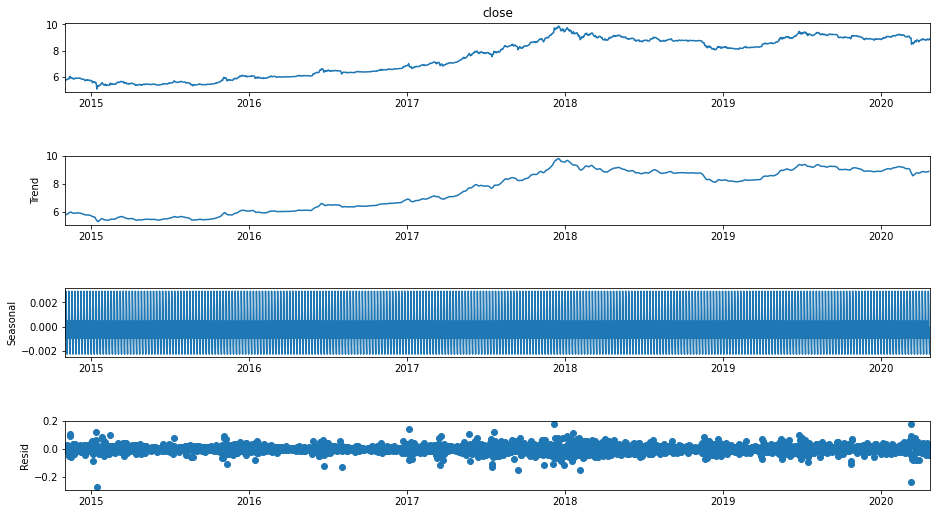

In [23]:
#pip install statsmodels
import statsmodels.api as sm
res = sm.tsa.seasonal_decompose(df_close)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [24]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

import joblib

sys.modules['sklearn.externals.joblib'] = joblib

In [25]:
#this will take half an hour
#pip install pmdarima
from pmdarima.arima import auto_arima


stepwise_fit = auto_arima(train, start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.93 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-1983.335, Time=0.25 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-5761.734, Time=2.27 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-3605.302, Time=1.99 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-1944.811, Time=0.20 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-5296.873, Time=0.35 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-5942.700, Time=5.50 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.30 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.23 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-1995.916, Time=2.80 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-5941.042, Time=14.20 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=-5941.033, Time=10.04 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=-3603.355, Time=7.50 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=-5938.714, Time=9.58 sec
 ARIMA(1,0,0)(2,1,0)[

In [26]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1801
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood                2975.574
Date:                            Sat, 18 Mar 2023   AIC                          -5943.148
Time:                                    14:45:48   BIC                          -5921.190
Sample:                                11-02-2014   HQIC                         -5935.040
                                     - 10-07-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9687      0.004    237.039      0.000       0.961       0.977
ar.S.L12      -0.6461      0.016    -40.223      0.000      -0.678      -0.615
ar.S.L24      -0.3156      0.018    -17.585      0.000      -0.351      -0.280
sigma2         0.0021   3.99e-05     52.526      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):              1360.85
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.31
Prob(H) (two-sided):                  0.01   Kurtosis:                         7.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 
  
model = SARIMAX(train,  
                order = (1,0,0),  
                seasonal_order =(0,1,1,12)) 
  
result = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [28]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                close   No. Observations:                 1801
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                3204.058
Date:                              Sat, 18 Mar 2023   AIC                          -6402.117
Time:                                      14:45:59   BIC                          -6385.648
Sample:                                  11-02-2014   HQIC                         -6396.036
                                       - 10-07-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.063     15.981      0.000       0.877       1.123
ma.S.L12      -1.0000      2.003     -0.499      0.618      -4.925       2.926
sigma2         0.0016      0.003      0.516      0.606      -0.004       0.008
===================================================================================
Ljung-Box (L1) (Q):                   1.26   Jarque-Bera (JB):              1810.69
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                            -0.25
Prob(H) (two-sided):                  0.07   Kurtosis:                         7.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density 
function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences 
about the population are made, based on a finite data sample.

A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles 
came from the same distribution, we should see the points forming a line that’s roughly straight

We have an ACF plot. In simple terms, it describes how well the present value of the series is related with its past values.
A time series can have components like trend, seasonality, cyclic and residual. ACF considers all these components while 
finding correlations hence it's a 'complete auto-correlation plot'.

The correlogram is a commonly used tool for checking randomness in a data set. If random, autocorrelations should be near 
zero for any and all time-lag separations. If non-random, then one or more of the autocorrelations will be significantly 
non-zero.

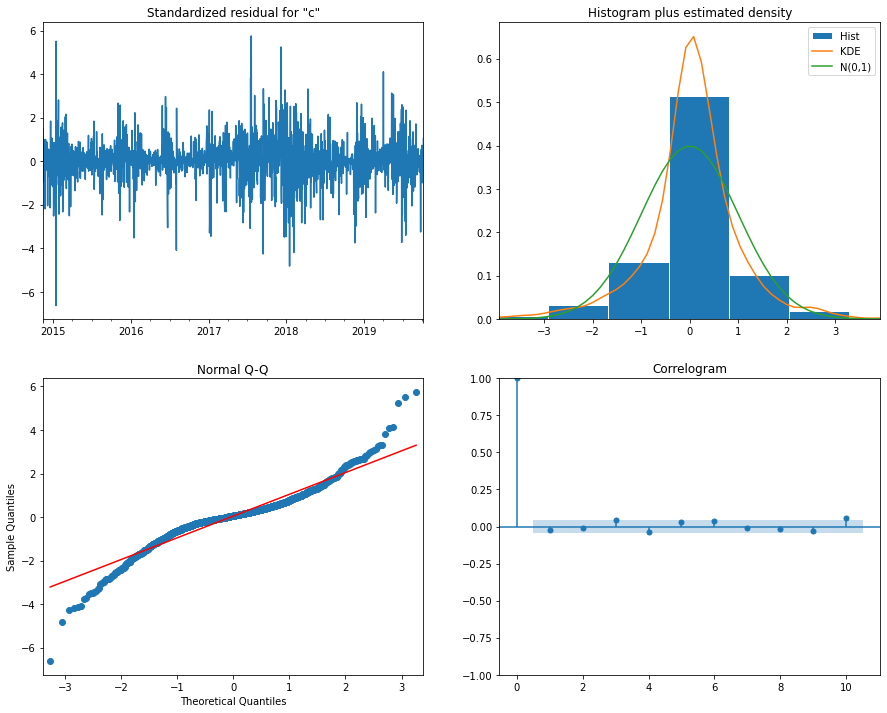

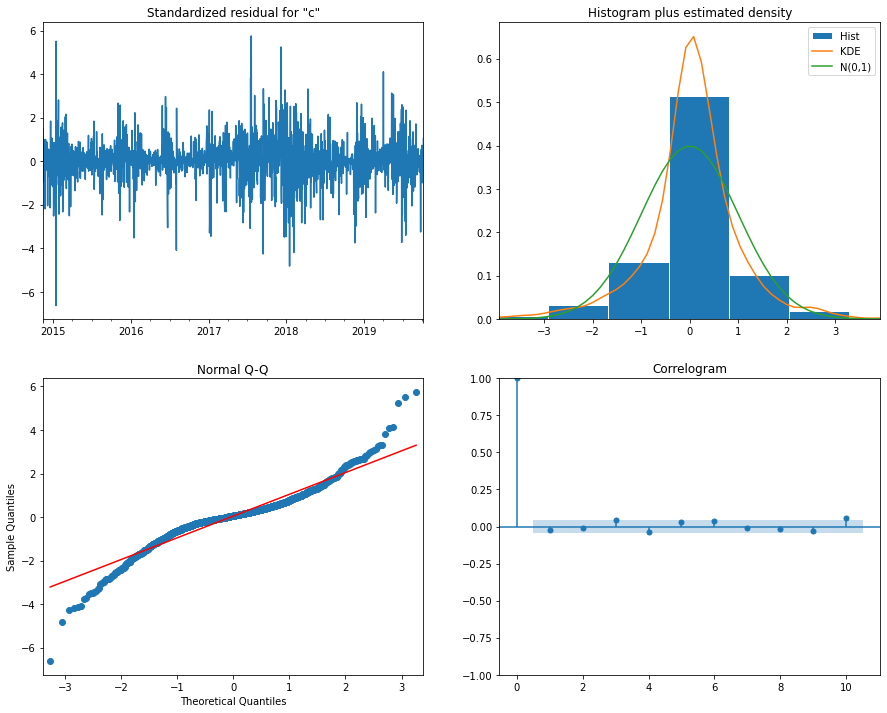

In [29]:
result.plot_diagnostics(figsize=(15, 12))

In [30]:
start = len(train) 
end = len(train) + len(test) - 1

In [31]:
# Predictions for one-year against the test set 
predictions_train = result.predict(0, end, typ = 'levels').rename("Predictions") 

In [32]:
predictions_test = result.predict(start, end, typ = 'levels').rename("Predictions")

In [33]:
predictions_year = result.predict(start, end+360, typ = 'levels').rename("Predictions")

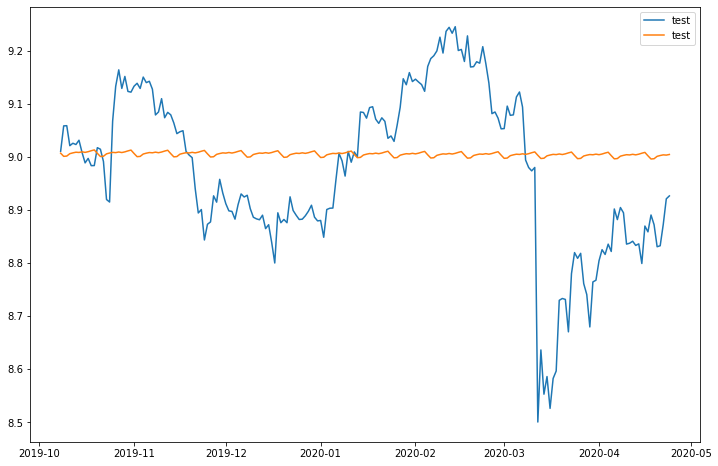

In [34]:
# plot predictions and actual values 


plt.figure(figsize = (12,8))
plt.plot(test,label = 'test')
plt.plot(predictions_test,label = 'test')
plt.legend(loc = 'best')

In [35]:
from sklearn.metrics import mean_squared_error 
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error 
rmse(test, predictions_test) 
  
# Calculate mean squared error 
mean_squared_error(test, predictions_test) 

0.023717635843747385

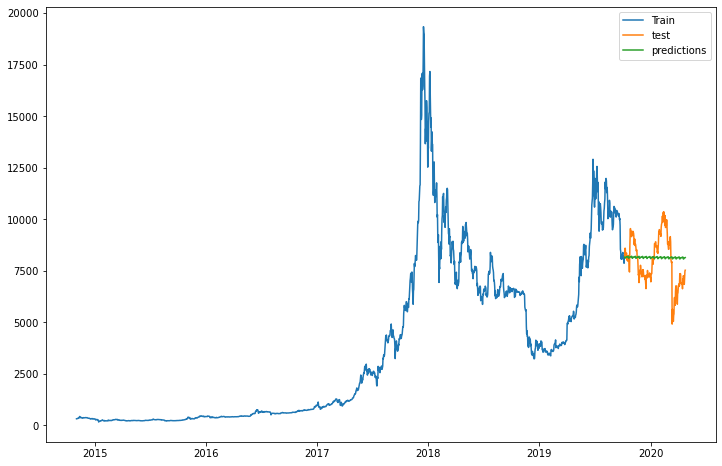

In [36]:

plt.figure(figsize = (12,8))
plt.plot(np.exp(train),label = 'Train')
plt.plot(np.exp(test),label = 'test')
plt.plot(np.exp(predictions_test),label = 'predictions')
plt.legend(loc = 'best')

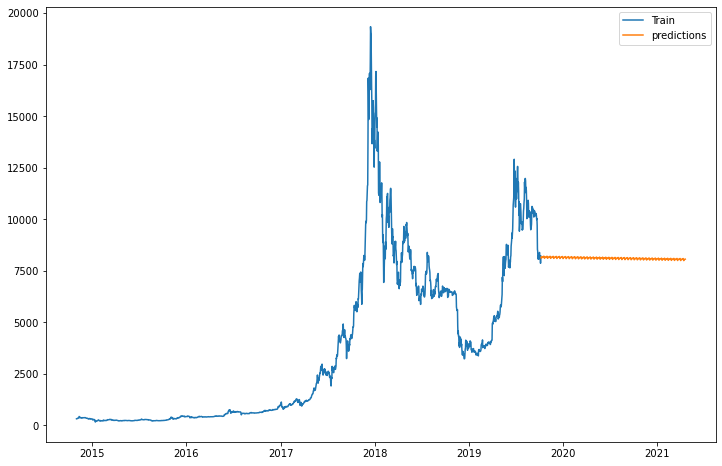

In [37]:
plt.figure(figsize = (12,8))
plt.plot(np.exp(train),label = 'Train')
plt.plot(np.exp(predictions_year),label = 'predictions')
plt.legend(loc = 'best')